Neutrino Mass Matrices

In [183]:
import numpy as np
import sympy as sy
import math
from numpy.random import default_rng
import matplotlib.pyplot as plt

Definimos las matrices de Gell-Mann

In [184]:
l0 = (np.sqrt(2/3))*np.array([[1,0,0],[0,1,0],[0,0,1]])
l1 = np.array([[0,1,0],[1,0,0],[0,0,0]])
l2 = np.array([[0,-1j,0],[1j,0,0],[0,0,0]])
l3 = np.array([[1,0,0],[0,-1,0],[0,0,0]])
l4 = np.array([[0,0,1],[0,0,0],[1,0,0]])
l5 = np.array([[0,0,-1j],[0,0,0],[1j,0,0]])
l6 = np.array([[0,0,0],[0,0,1],[0,1,0]])
l7 = np.array([[0,0,0],[0,0,-1j],[0,1j,0]])
l8 = (1/math.sqrt(3))*np.array([[1,0,0],[0,1,0],[0,0,-2]])

lam = np.array([l0,l1,l2,l3,l4,l5,l6,l7,l8])
# print('l1=', l1, 'l2=', l2, 'l3=', l3 , 'l4=',l4 ,'l5=',l5 , 'l6=', l6, 'l7=',l7 , 'l8',l8)

Definimos un producto punto entre matrices

In [185]:
Ra=default_rng(42).random((3,3))

def matrixdot(A,B):
    return np.trace(A@B)/2

def matrixcoeff(A):
    cr =np.zeros(shape=(9), dtype = 'complex_')
    for n in range(0,9):
        cr[n] = matrixdot(A,lam[n])
    return cr

In [186]:
(matrixdot(lam[4], lam[4])) 

(1+0j)

In [187]:
(matrixcoeff(lam[8]))


array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       1.+0.j])

In [188]:

np.einsum('i,ijk',matrixcoeff(Ra),lam)


array([[0.77395605+0.j, 0.43887844+0.j, 0.85859792+0.j],
       [0.69736803+0.j, 0.09417735+0.j, 0.97562235+0.j],
       [0.7611397 +0.j, 0.78606431+0.j, 0.12811363+0.j]])

In [189]:
Ra - np.einsum('i,ijk',matrixcoeff(Ra),lam)

array([[ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j, -2.77555756e-17+0.j,  0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  1.11022302e-16+0.j]])

Definimos las matrices diagonales para las masas de los quarks; up, down y ()

In [190]:
m_u=2.16e+6
m_c=1.27e+9
m_t=172.69e+9
m_b=4.18e+9
m_d=4.67e+6
m_s=93e+6
m_e=0.51099e+6
m_mu=105.6583e+6
m_tau=1776.86e+6

Mu= (1/m_t)*np.diagflat([m_u,m_c,m_t], 0)
print(Mu)
Md= (1/m_b)*np.diagflat([m_d,m_s,m_b],0)
print(Md)
Ml= (1/m_tau)*np.diagflat([m_e,m_mu,m_tau],0)
print(Ml)

[[1.25079622e-05 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.35421854e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[0.00111722 0.         0.        ]
 [0.         0.0222488  0.        ]
 [0.         0.         1.        ]]
[[2.87580338e-04 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.94634918e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [191]:
matrixcoeff(Mu)

array([ 0.41125574+0.j,  0.        +0.j,  0.        +0.j, -0.00367086+0.j,
        0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
       -0.57522368+0.j])

In [192]:
matrixcoeff(Md)

array([ 0.41778743+0.j,  0.        +0.j,  0.        +0.j, -0.01056579+0.j,
        0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
       -0.57060508+0.j])

In [193]:
matrixcoeff(Ml)

array([ 0.43264156+0.j,  0.        +0.j,  0.        +0.j, -0.02958796+0.j,
        0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
       -0.56010162+0.j])

Calculamos $C_0$ para $M$

In [194]:
C01=np.sqrt(3/2)*matrixdot(l0, Mu)
print('C_01=',C01)

C_01= 0.5036833632520701


In [195]:
C02=np.sqrt(3/2)*matrixdot(l0, Md)
print('C_02=',C02)

C_02= 0.5116830143540669


In [196]:
C03=np.sqrt(3/2)*matrixdot(l0, Ml)
print('C_03=',C03)

C_03= 0.5298755360579899


Calculamos la derivada de $C_0$ respecto a las masas en $M_u, M_d y M_l$.

Para +$\Delta$

In [197]:
C0Mu= 1/m_t
C0Mc= 1/m_t
C0Mt= -(m_u+m_c)/m_t**2
dm_u=0.49e+6
dm_c=0.02e+9
dm_t=0.4e+9

DC01= C0Mu*dm_u + C0Mc*dm_c + C0Mt*dm_t
print(DC01)

0.00010158844981379264


In [198]:
C0Md=1/m_b
C0Ms=1/m_b
C0Mb=-(m_d+m_s)/m_b**2
dm_d=0.48e+6
dm_b=0.03e+9
dm_s=11e+6
DC02= C0Md*dm_d + C0Ms*dm_s + C0Mb*dm_b
print(DC02)

0.002578712712621048


In [199]:
C0Me=1/m_tau
C0Mmu=1/m_tau
C0Mtau=(m_e+m_mu)/m_tau**2
dm_e=0.0000000031e+6
dm_mu=0.0000024e+6
dm_tau=0.12e+6
DC03= C0Me*dm_e + C0Mmu*dm_mu + C0Mtau*dm_tau
print(DC03)

4.036633023376959e-06


$\Delta C_{0u}= 0.00010158844981379264$

$\Delta C_{0d}= 0.002578712712621048$

$\Delta C_{0l}=4.036633023376959e-06$

Ahora construimos la gráfica de errores para cada matriz.

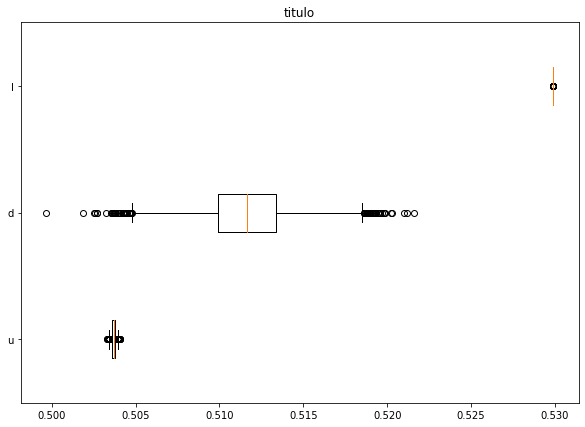

In [200]:
data1 = np.random.normal(C01, DC01, 10000)
data2 = np.random.normal(C02, DC02, 10000)
data3 = np.random.normal(C03, DC03, 10000)
data= [data1,data2,data3]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)


plt.boxplot(data, labels=['u', 'd', 'l'], vert=0)
plt.title("titulo")
plt.show()

Prueba para asimetricos(Fallida)

[[ 0.50368336  0.51168301  0.52987554]
 [ 1.00010159  1.00257871  1.00000404]
 [-0.99989841 -0.99742129 -0.99999596]]


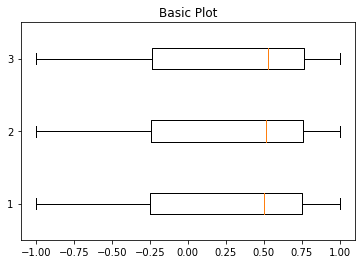

In [211]:
data1 = np.array([[C01, C02, C03],
                  [DC01+1, DC02+1, DC03+1],
                  [DC01-1, DC02-1, DC03-1]])

fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(data1, vert=0)
print(data1)

In [202]:
((m_e+m_mu)/m_tau+1), C03 , 2*C03

(1.05975107211598, 0.5298755360579899, 1.0597510721159797)

In [222]:
C03=(np.sqrt(3/2))*matrixdot(l0, Ml)
print('C_03=',C03)

C33=matrixdot(l3, Ml)
print('C_33=', C33)

C83=matrixdot(l8, Ml)
print('C_83',C83)

m3=0.05
m1=m3*C33+m3*np.sqrt(3)*C83+m3
print('m_1=',m1)

m10=(m3/2)*(2*(C33+C03)-1)

m2=m3*np.sqrt(3)*C83-m3*C33+m3
print('m_2=',m2)

m20=m3*C03-m3/2-m3*C33
print('m_3=',m3)

C_03= 0.5298755360579899
C_33= -0.029587955719640267
C_83 -0.560101620404361
m_1= 1.4379016917476228e-05
m_2= 0.002973174588881508
0.0029731745888815055
m_3= 0.05


$\Delta C_{3l}=-0.029587955719640267
\\ 
\Delta C_{8l}=-0.560101620404361$

$m_1=\frac{m_3}{2}\times(\sqrt(3)*2*C_{83}+2*C_{03}+2)$

$m_2=m_3\sqrt(3)C_{83}-m_3C_{33}+m_3$


In [204]:
(m_e-m_mu)/m_tau , C33 ,2*C33

(-0.059175911439280526, -0.029587955719640267, -0.05917591143928053)

In [205]:
1/np.sqrt(3)*((m_e+m_mu)/m_tau -2),C83, 2*C83

(-1.120203240808722, -0.560101620404361, -1.120203240808722)

In [206]:

D2m_21=m2**2-m1**2
#print(D2m_21)
D2m_32=m3**2-m2**2
#print(D2m_32)

$\Delta (m_{21})^2= 8.83956037984321e-06$

$\Delta (m_{32})^2=0.00249116023286403$

Ahora queremos representar gráficamente la relación entre estas diferencias de masa y la masa fija.

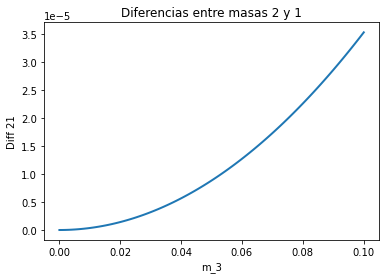

In [241]:
x=np.linspace(1e-4,1e-1,100)
m10=(x*(C33+C03)-x/2)
m20=x*C03-x/2-x*C33
y=(x*C03-x/2-x*C33)**2-(x*(C33+C03)-x/2)**2

# plot
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)
ax.set_xlabel('m_3')
ax.set_ylabel('Diff 21')
ax.set_title('Diferencias entre masas 2 y 1')


plt.show()


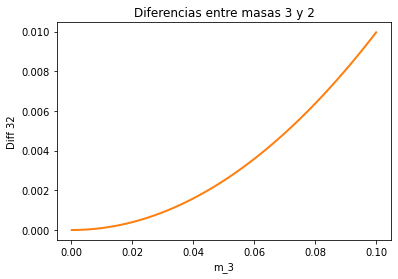

In [242]:
x=np.linspace(1e-4,1e-1,100)
m20=x*C03-x/2-x*C33
y=x**2-(x*C03-x/2-x*C33)**2

# plot
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0, color='tab:orange')
ax.set_xlabel('m_3')
ax.set_ylabel('Diff 32')
ax.set_title('Diferencias entre masas 3 y 2')

plt.show()

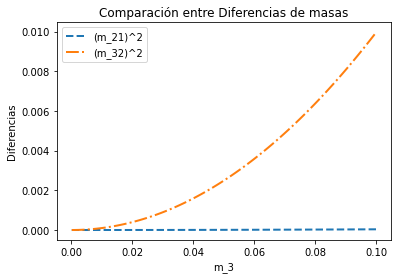

In [264]:
x=np.linspace(1e-4,1e-1,100)
m10=(x*(C33+C03)-x/2)
m20=x*C03-x/2-x*C33
y1=(x*C03-x/2-x*C33)**2-(x*(C33+C03)-x/2)**2
y2=x**2-(x*C03-x/2-x*C33)**2

# plot
fig, ax = plt.subplots()

line1, = ax.plot(x, y1, linewidth=2.0, label='(m_21)^2', linestyle='dashed')
line2, =ax.plot(x, y2, linewidth=2.0, label='(m_32)^2', linestyle='dashdot')
ax.set_xlabel('m_3')
ax.set_ylabel('Diferencias')
ax.set_title('Comparación entre Diferencias de masas')

ax.legend()
plt.show()